In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(train_path, test_path):
    # Load the datasets
    data_train = pd.read_csv(train_path)
    data_test = pd.read_csv(test_path)
    
    # Create a binary label based on the "Chance of Admit" column
    median_chance = data_train['Chance of Admit '].median()
    data_train['Admit Binary'] = (data_train['Chance of Admit '] > median_chance).astype(int)
    
    # Split the data into features and labels, excluding irrelevant columns
    X = data_train.drop(['Chance of Admit ', 'Admit Binary', 'Serial No.', 'Unnamed: 0'], axis=1)
    y = data_train['Admit Binary']
    
    # Split the data into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_val, y_train, y_val

# Paths to the dataset files
train_path = "/Users/ritikanigam/Downloads/data_train-2.csv"
test_path = "/Users/ritikanigam/Downloads/data_test-2.csv"

# Preprocess the data
X_train, X_val, y_train, y_val = load_and_preprocess_data(train_path, test_path)

# Print the shapes of the training and validation sets
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")


Training features shape: (256, 7)
Validation features shape: (64, 7)
Training labels shape: (256,)
Validation labels shape: (64,)


In [9]:
from sklearn.svm import SVC

# Initialize SVM models with the specified kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

# Print the initialized models to confirm
print("Initialized SVM models:")
print("Linear Kernel:", svm_linear)
print("RBF Kernel:", svm_rbf)
print("Polynomial (degree 3) Kernel:", svm_poly)


Initialized SVM models:
Linear Kernel: SVC(kernel='linear')
RBF Kernel: SVC()
Polynomial (degree 3) Kernel: SVC(kernel='poly')


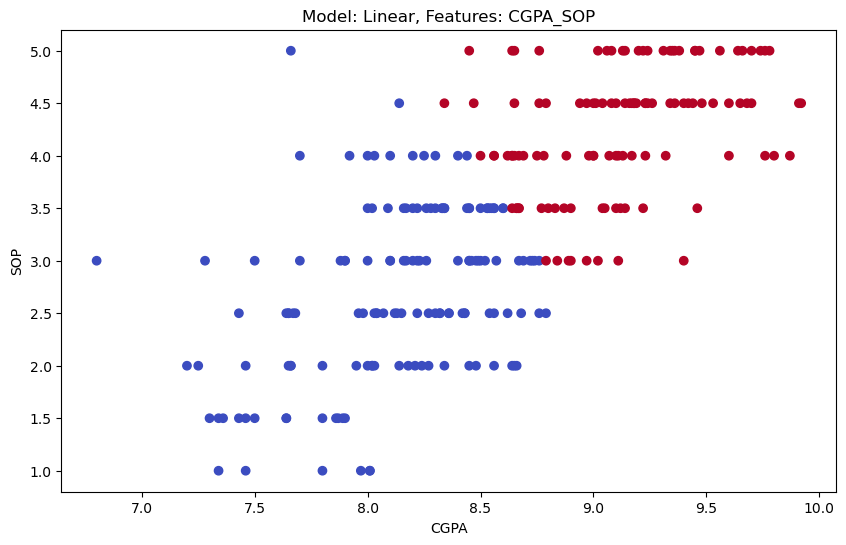

Model: Linear, Features: CGPA_SOP, Accuracy: 0.81, Support Vectors: [46 45]


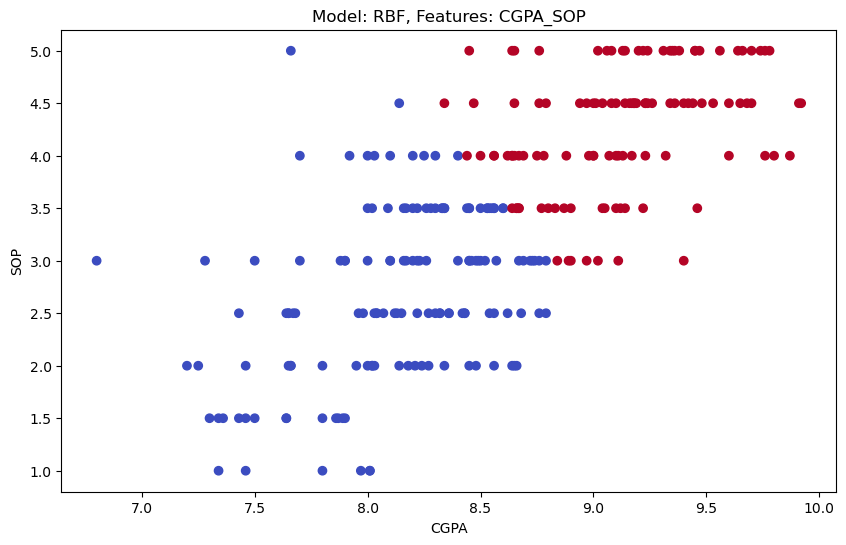

Model: RBF, Features: CGPA_SOP, Accuracy: 0.83, Support Vectors: [58 57]


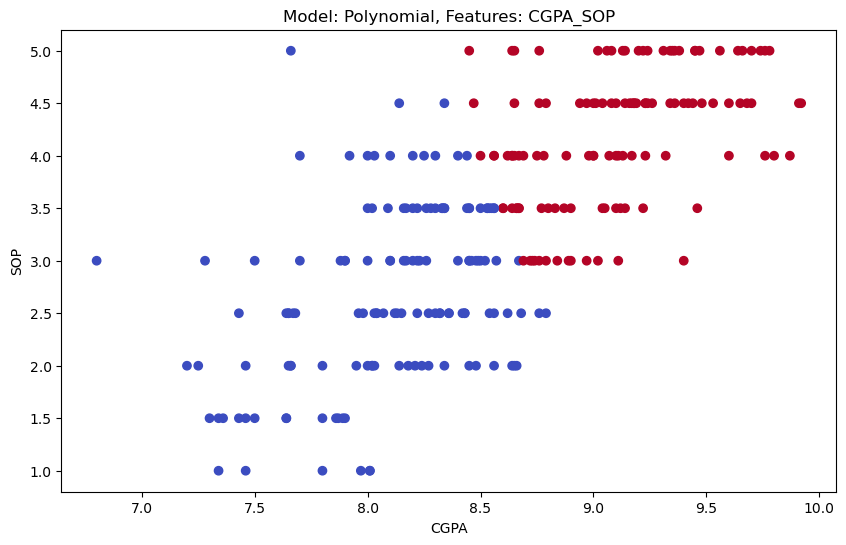

Model: Polynomial, Features: CGPA_SOP, Accuracy: 0.81, Support Vectors: [42 41]


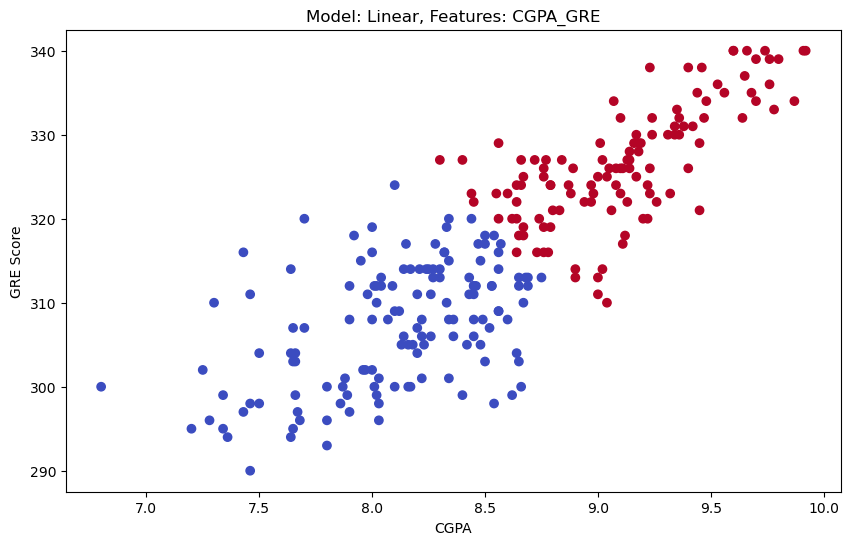

Model: Linear, Features: CGPA_GRE, Accuracy: 0.81, Support Vectors: [43 43]


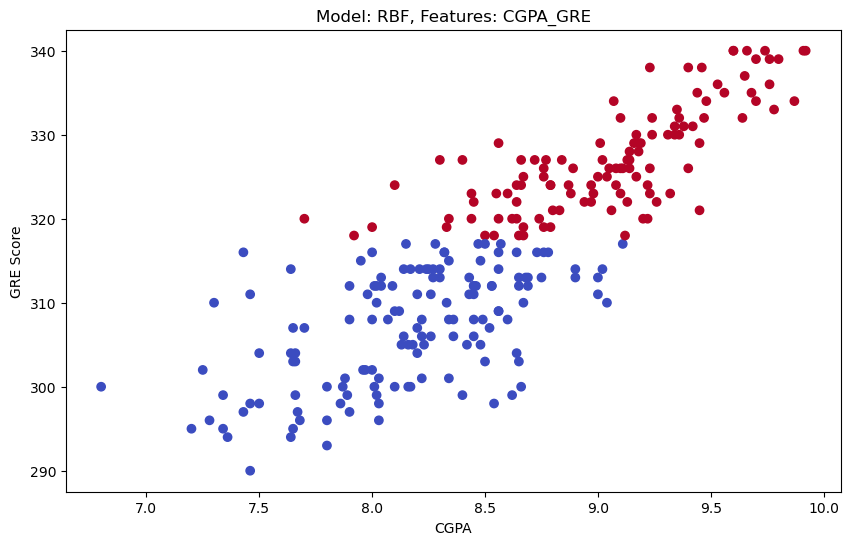

Model: RBF, Features: CGPA_GRE, Accuracy: 0.77, Support Vectors: [108 108]


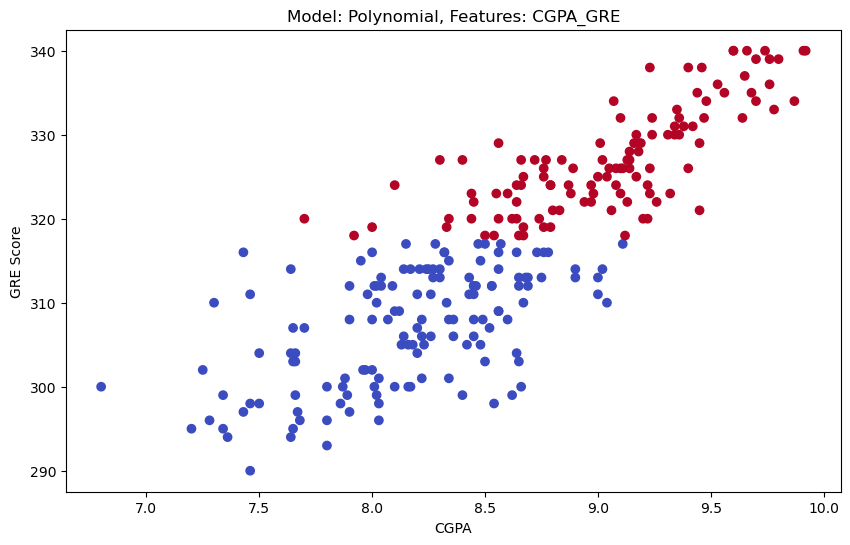

Model: Polynomial, Features: CGPA_GRE, Accuracy: 0.77, Support Vectors: [63 63]


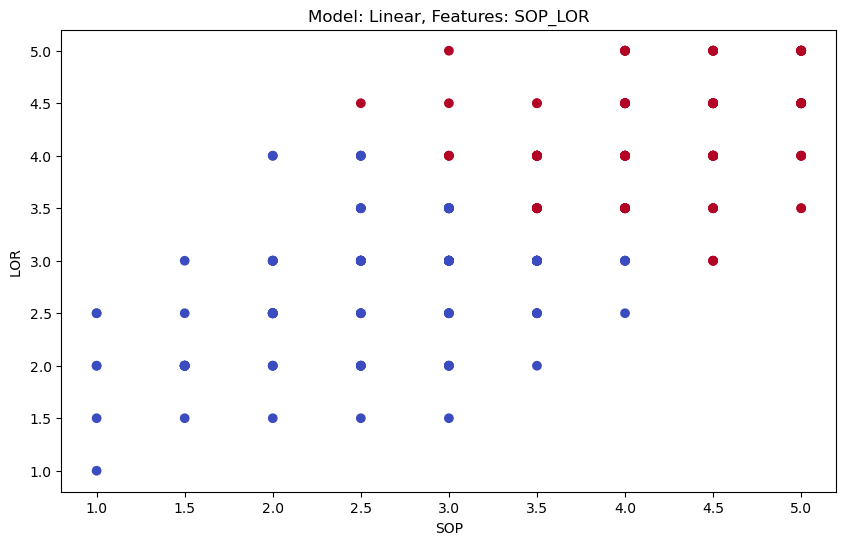

Model: Linear, Features: SOP_LOR, Accuracy: 0.77, Support Vectors: [58 58]


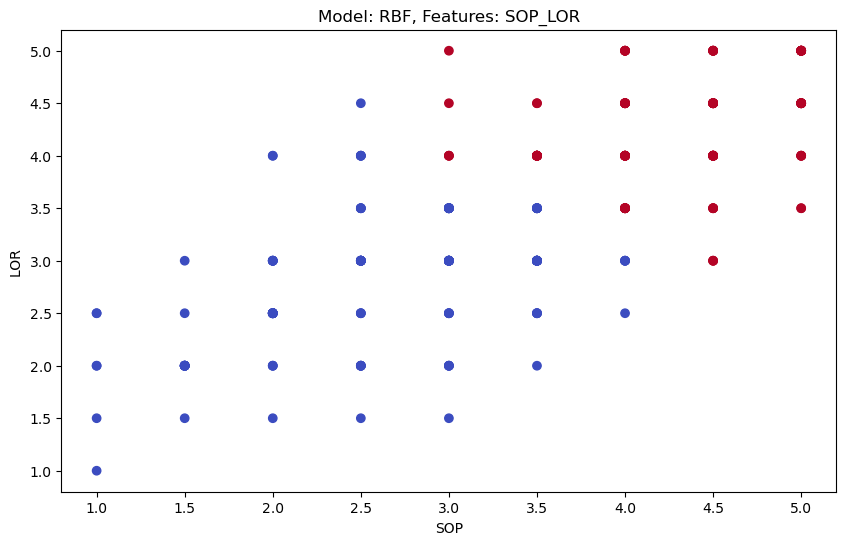

Model: RBF, Features: SOP_LOR, Accuracy: 0.75, Support Vectors: [59 59]


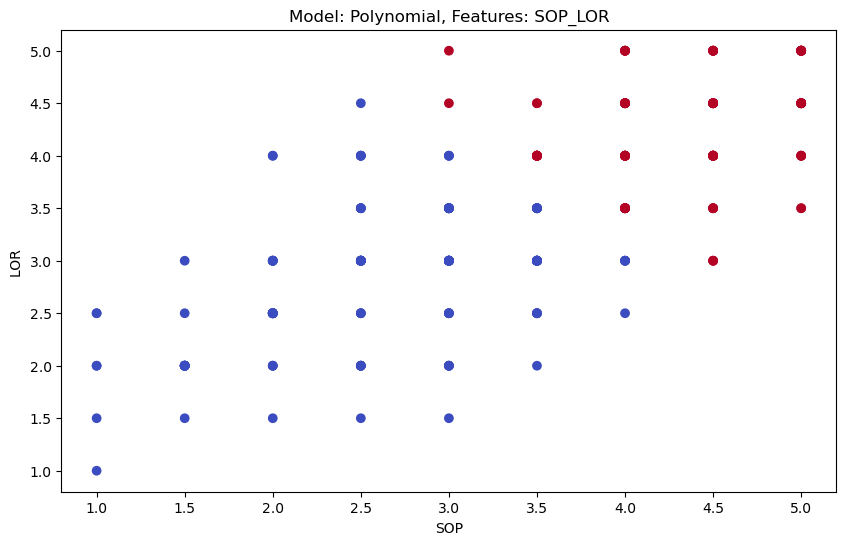

Model: Polynomial, Features: SOP_LOR, Accuracy: 0.77, Support Vectors: [58 57]


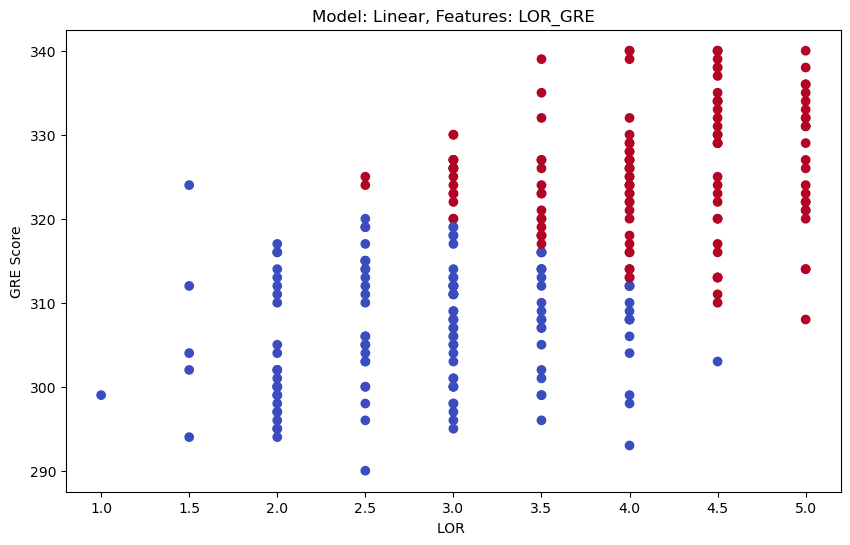

Model: Linear, Features: LOR_GRE, Accuracy: 0.81, Support Vectors: [43 43]


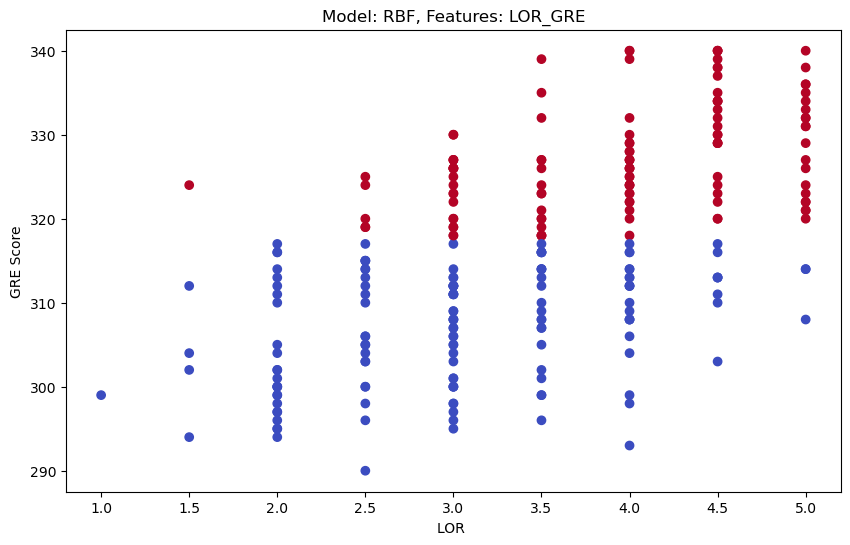

Model: RBF, Features: LOR_GRE, Accuracy: 0.77, Support Vectors: [109 109]


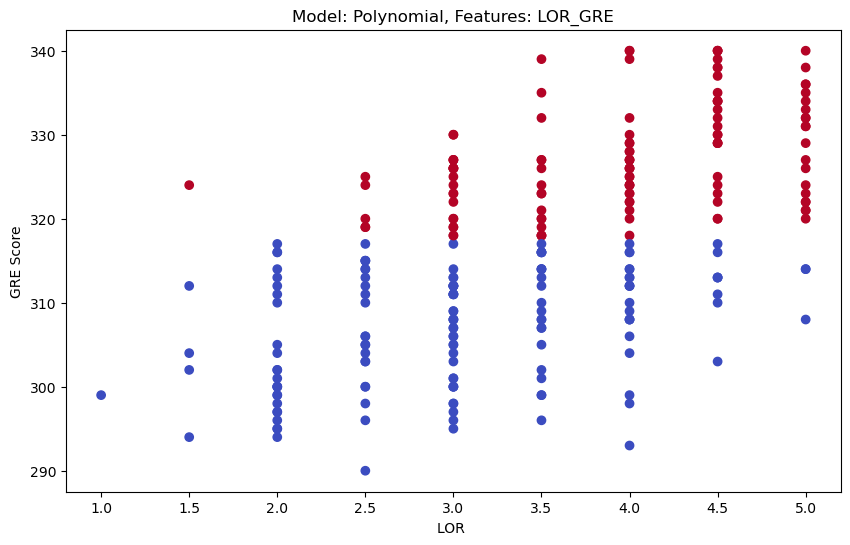

Model: Polynomial, Features: LOR_GRE, Accuracy: 0.77, Support Vectors: [63 63]


In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the feature combinations
feature_combinations = {
    'CGPA_SOP': ['CGPA', 'SOP'],
    'CGPA_GRE': ['CGPA', 'GRE Score'],
    'SOP_LOR': ['SOP', 'LOR '],
    'LOR_GRE': ['LOR ', 'GRE Score']
}

# Models to train
models = {
    'Linear': SVC(kernel='linear'),
    'RBF': SVC(kernel='rbf'),
    'Polynomial': SVC(kernel='poly', degree=3)
}

# Train each model with each feature combination
for name, features in feature_combinations.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_subset, y_train)
        
        # Support Vectors
        support_vectors = model.support_vectors_
        num_support_vectors = model.n_support_
        
        # Predictions on the training set for visualization
        y_train_pred = model.predict(X_train_subset)
        
        # Visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train_pred, cmap='coolwarm', marker='o')
        plt.title(f'Model: {model_name}, Features: {name}')
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.show()
        
        # Evaluate on the validation set
        y_val_pred = model.predict(X_val_subset)
        accuracy = accuracy_score(y_val, y_val_pred)
        print(f'Model: {model_name}, Features: {name}, Accuracy: {accuracy:.2f}, Support Vectors: {num_support_vectors}')


In [13]:
# Assuming RBF kernel with CGPA and GRE Score provided the best accuracy
best_features = ['CGPA', 'SOP']
best_model = SVC(kernel='rbf').fit(X_train[best_features], y_train)  # This model is already trained in the previous steps

# Now, predicting the test data labels
X_test_subset = data_test[best_features]  # Make sure your test dataset has these columns
y_test_pred = best_model.predict(X_test_subset)

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(y_test_pred, columns=['pred_svm'])
predictions_df.to_csv('Ritika_Nigam_preds.csv', index=False)
